# PHYS 434 Lab 1 #

Tianhao Jiang


## **Normal Distribution**



Importing the libraries:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

 Below, a standard normal distribution is integrated from -1, 0, 1, 2, and 3 to infinity. The resulting values do match the z-table.

In [2]:
p = 1-stats.norm.cdf([-1, 0, 1, 2, 5],loc = 0, scale = 1)
print(p)

[8.41344746e-01 5.00000000e-01 1.58655254e-01 2.27501319e-02
 2.86651572e-07]


<br>The sigma values are determined with the probabilities associated with with -1, 0 1, 2, and 5 sigma. The resulting sigma values are -1, 0, 1, 2, and 5 as expected.

In [3]:
print(-stats.norm.ppf(p, loc = 0, scale = 1))

[-1. -0.  1.  2.  5.]


The -1 sigma corresponds to the probability of observing a value larger than -1 from a standard normal distribution.

## Rayleigh distribution ##

I chose a Rayleigh distribution with its $\sigma=1$ and plotted a histogram of 100,000 points drawn from the distribution (in blue), and the PDF of the distribution (in orange).

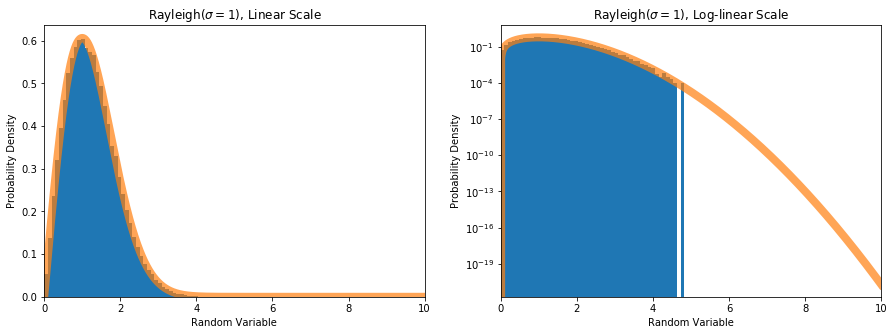

In [21]:
fig, ax = plt.subplots(1,2)
plt.setp(ax, xlim=(0,10))
plt.rcParams["figure.figsize"] = (15,5)
data = stats.rayleigh.rvs(loc = 0, scale = 1, size = 100000)
x = np.linspace(0,10,1000)
distribution = stats.rayleigh.pdf(x,loc = 0, scale = 1)
ax[0].hist(data,50, density=True)
ax[0].set_title('Rayleigh($\sigma=1$), Linear Scale')
ax[0].plot(x,distribution,linewidth = 8,alpha = 0.7)
ax[0].set_xlabel('Random Variable')
ax[0].set_ylabel('Probability Density')
ax[1].set_xlabel('Random Variable')
ax[1].set_ylabel('Probability Density')
ax[1].hist(data,50, density=True)
ax[1].set_title('Rayleigh($\sigma=1$), Log-linear Scale')
ax[1].set_yscale("log")
ax[1].plot(x,distribution,linewidth = 8,alpha = 0.7)
plt.show()

My statistical question: assume I observed a value of 5, then if there is no signal, and the signal-free data has a Rayleigh distribution with its scale parameter σ = 1, what is the probability that the data produces a signal that is equally or more signal-like than what I observed?

This probability is found by integrating the Rayleigh distribution from 1 to infinity:

\begin{align}
\text{Probability}=\int_{a}^{\infty} \frac{x}{\sigma^2}e^{\frac{-x^2}{2\sigma^2}} \,dx
\end{align}
where $a = 5$ and $\sigma = 1$.

Calculate the probability:

In [6]:
p = 1 - stats.rayleigh.cdf(0.05, loc = 0, scale = 0.01)
print(p)

3.7266531720536733e-06


Calculate the 'sigmas' of the probability:

In [7]:
print(-stats.norm.ppf(p, loc = 0, scale = 1))

4.4803146987717914


My probability is 4.48$\sigma$.

Below, the probabilities and 'sigmas' of 1000 hypothetical measurement values evenly spaced between 0 and 8 are plotted. The graph of the probabilities is plotted in logarithmic scale. 

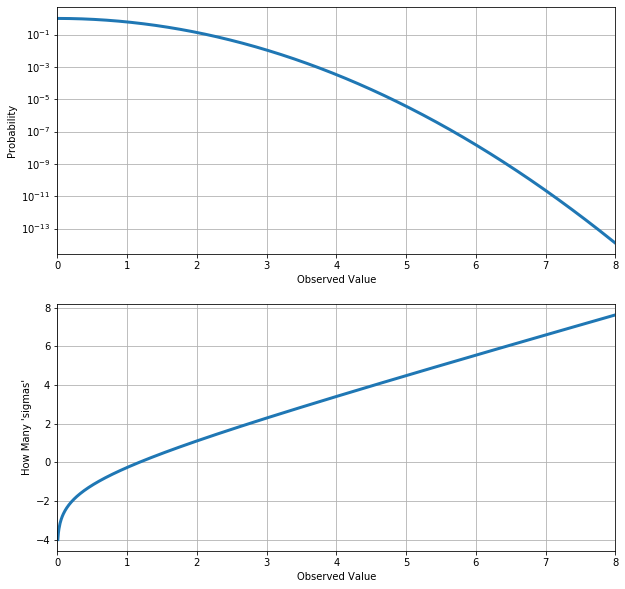

In [22]:
x = np.linspace(0,8,1000)
p = 1 - stats.rayleigh.cdf(x, loc = 0, scale = 1)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].set_xlim([0,8])
axs[0].set_yscale("log")
axs[0].grid()
axs[0].set_xlabel('Observed Value')
axs[0].set_ylabel('Probability')
axs[0].plot(x,p,linewidth = 3,alpha = 1)
axs[1].set_xlim([0,8])
axs[1].grid()
axs[1].set_xlabel('Observed Value')
axs[1].set_ylabel('How Many \'sigmas\'')
axs[1].plot(x,-stats.norm.ppf(p,loc = 0, scale = 1),linewidth = 3,alpha = 1)
plt.show()

It can be seen that the curve of the probability graph (the first of the two graphs above) looks very similar to the right side of the probability density functions of normal distributions. This makes sense since the two functions have the same mathematical form.

From the 'sigmas' graph, it seems the 'sigmas' vs. measured value curve is converging to a straight line with a slope of 1 as the measured value increases. This is because I chose the $\sigma$ parameter of the corresponding Rayleigh distribution to be 1. And it can be proven that the curve would converge to the function $f(x)=\frac{1}{\sigma}x$, where $\sigma$ is the parameter of the corresponding Rayleigh distribution.

## **Non-continuous distributions**

I chose the binomial distribution



A Binomial distribution has two parameters $n$ and $p$. $n$ is a positive integer representing the number of trials, and $p$ is a continuous variable between 0 and 1 (inclusive) representing the rate of success for each trial.
Below, the probability mass functions of binomial distributions with 8 different $n$ values ranging from 10 to 1000 and 5 different $p$ values from 0.1 to 0.9 are plotted. 

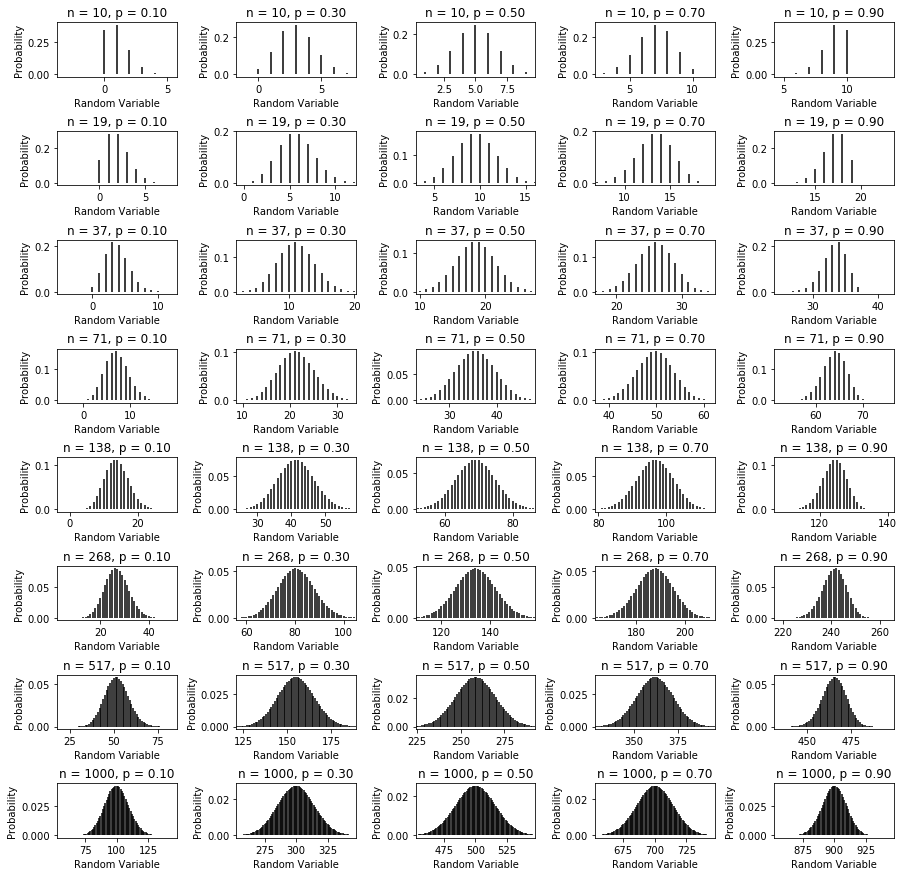

In [25]:
import math
n_count = 8
p_count = 5
#n_space = np.logspace(0,5,n_count)
p_space = np.linspace(0.1,0.9,p_count)
n_space = np.logspace(1,3,n_count)

f, axs = plt.subplots(n_count, p_count, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=1)
for i in range(0, n_count):
    for j in range(0, p_count):
        ax = axs[i][j]
        n, p = int(n_space[i]), p_space[j]
        #print("(%d, %.2f)" % (n_space[i], p_space[j]))
        x = range(0, n + 1)
        mean = n*p
        sd = math.sqrt(n*0.5*(1-0.5)) # actually the sd when p = 0.5
        ax.set_xlim([mean - 3*sd, mean + 3*sd])
        #ax.set_yscale("log")
        ax.set_title("n = %d, p = %.2f" % (n, p))
        ax.set_xlabel('Random Variable')
        ax.set_ylabel('Probability')
        ax.vlines(x, [0], stats.binom.pmf(x, n, p))


The 40 graphs are formatted such that the n values are increasing from top to bottom and the $p$ values are ascending from left to right.

As shown, the Binomial distributions are symmetric about their means when their $p$ values equal 0.5; and the distributions become more skewed when their $p$ values deviate from 0.5. As the $n$ values increase, the distributions appear to more and more resemble Gaussian distributions. It can also be seen that for the same $p$ value, the percentage standard deviation of a Binomial distribution decreases as its $n$ value increases; and with the same $n$ value, a binomial distribution would see decreases in its standard deviation when its $p$ value deviates from 0.5. 

My hypothetical question:

Assume I observed a count of 60.

If there is no signal, and the signal-free data has a Binomial distribution with $n=100$ and $p=0.5$, what is the probability that the data produces a signal that is equally or more signal-like (by saying 'more signal-like', I mean observing a count that is larger than 60) than what I observed?

Calculate the probability:

In [10]:
p = 1 - stats.binom.cdf(60, 100, 0.5)
print(p)

0.01760010010885238


Calculate the corresponding number of 'sigmas':

In [11]:
-stats.norm.ppf(p, loc = 0, scale = 1)

2.106047802667657

I don't see any special implication of the probabilities being discrete. The only difference I can see between continuous and discrete distribution interms of the probabilities is that the number of different 'sigmas' corresponding to a given range of observed values is no longer infinite for a discrete distribution.

A distribution being discrete only implies that the possible values observed from the distribution are discrete, and is unrelated to whether any of its parameters are discrete or not. A distribution parameter being continuous also doesn't imply that the distribution is continuous. For example, the parameter $p$ of a binomial distribution is a probability ranging from 0 to 1 and is continuous. But this continuity only implies that, with a continuous change in the value of $p$, the corresponding change in the probability of observing a given value from the distribution would also be continuous, which is completely unrelated to the fact that the distribution itself is discrete.